Задание 1\
Импортируйте библиотеки pandas, numpy и matplotlib.\
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.\
Создайте датафреймы X и y из этих данных.\
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.\
Масштабируйте данные с помощью StandardScaler.\
Постройте модель TSNE на тренировочный данных с параметрами:\
n_components=2, learning_rate=250, random_state=42.\
Постройте диаграмму рассеяния на этих данных.

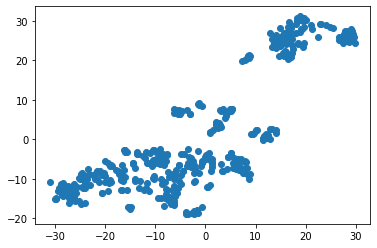

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
boston = load_boston()
X, y = pd.DataFrame(boston.data, columns=boston.feature_names), boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=boston.feature_names)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2\
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.\
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.\
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.\
Вычислите средние значения price и CRIM в разных кластерах.

Cluster 0: mean price = 27.78837209302326, mean CRIM = 0.07356558139534884
Cluster 1: mean price = 16.165354330708663, mean CRIM = 10.797028425196851
Cluster 2: mean price = 24.958115183246072, mean CRIM = 0.4216602094240837


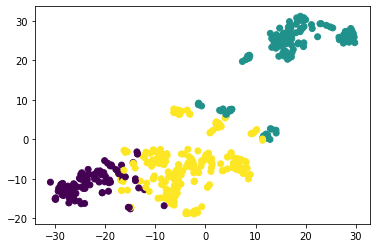

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
clusters_n = [0, 1, 2]
for n in clusters_n:
    print(f'Cluster {n}: mean price = {y_train[labels_train == n].mean()}, mean CRIM = {X_train.CRIM[labels_train == n].mean()}')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

*Задание 3\
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.\
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Cluster 0: mean price = 31.35, mean CRIM = 0.06206
Cluster 1: mean price = 16.43714285714286, mean CRIM = 10.165531142857143
Cluster 2: mean price = 21.860784313725492, mean CRIM = 0.2660788235294118


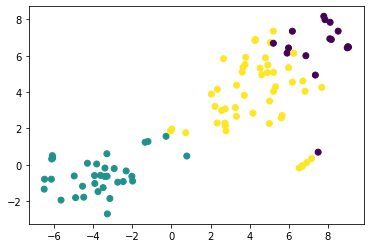

In [3]:
labels_test = kmeans.predict(X_test_scaled)

for n in clusters_n:
    print(f'Cluster {n}: mean price = {y_test[labels_test == n].mean()}, mean CRIM = {X_test.CRIM[labels_test == n].mean()}')
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()